In [56]:
from contextlib import suppress
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from common.handlers import csv_read
from common.visualizations import plot_stacked_bar

In [2]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
sns.set()

In [130]:
path = Path.home() / "Google Drive/DDMA Hackathon"
cluster_data_f = path / "clusters_netherlands_kmeans.csv"
data_set_f = path / "unscaled_hackaton_dataset.csv"

columns = {"id", "clusters"}
cluster_data = csv_read(cluster_data_f)
cluster_data = [{
    col: d[col]
    for col in columns
} for d in cluster_data]
columns = [col for col in next(csv_read(cluster_data_f)) if col not in columns]

data_set = csv_read(data_set_f)
data_set = [d for d in data_set]

In [131]:
columns = [
    "indexed_price",
    "build_year",
    "use_surface",
    "parcel_surface",
    "score_totaal_2018",
    "number_of_objects",
    "huishoudens_met_kinderen",
    "gemiddelde_huishoudensgrootte",
    "0_tot_15",
    "15_tot_25",
    "25_tot_45",
    "45_tot_65",
    "65_+",
    "omgevingsadressendichtheid",
    "koopwoningen",
    "migratieachtergrond",
    "elektriciteitsverbruik",
    "aardgasverbruik",
    "percentage_meergezinswoning",
    "oppervlakte_land",
    "personenautos_huishouden",
]
# columns = [
#     "aantal_inwoners",
#     "mannen",
#     "vrouwen",
#     "0_tot_15",
#     "15_tot_25",
#     "25_tot_45",
#     "45_tot_65",
#     "65_+",
#     "ongehuwd",
#     "gehuwd",
#     "gescheiden",
#     "migratieachtergrond",
#     "geboorte_relatief",
#     "sterfte_relatief",
#     "huishoudens",
#     "eenpersoonshuishoudens",
#     "huishoudens_zonder_kinderen",
#     "huishoudens_met_kinderen",
#     "gemiddelde_huishoudensgrootte",
#     "bevolkingsdichtheid",
#     "woningvoorraad",
#     "percentage_eengezinswoning",
#     "percentage_meergezinswoning",
#     "percentage_bewoond",
#     "percentage_onbewoond",
#     "koopwoningen",
#     "huurwoningen",
#     "elektriciteitsverbruik",
#     "aardgasverbruik",
#     "bedrijfsvestigingen",
#     "landbouw_bosbouw_visserij",
#     "nijverheid_energie",
#     "handel_horeca",
#     "vervoer_informatie_communicatie",
#     "financiële_diensten_onroerendgoed",
#     "zakelijke_dienstverlening",
#     "cultuur_recreatie_overige",
#     "personenautos",
#     "personenautos_brandstof",
#     "personenautos_overige_brandstof",
#     "personenautos_huishouden",
#     "personenautos_oppervlakte",
#     "motorfietsen",
#     "oppervlakte",
#     "oppervlakte_land",
#     "oppervlakte_water",
#     "stedelijkheid",
#     "omgevingsadressendichtheid",
#     "score_totaal_2018",
#     "score_woningen_2018",
#     "score_bewoners_2018",
#     "score_voorzieningen_2018",
#     "score_veiligheid_2018",
#     "score_omgeving_2018",
#     "score_totaal_2012",
#     "score_woningen_2012",
#     "score_bewoners_2012",
#     "score_voorzieningen_2012",
#     "score_veiligheid_2012",
#     "score_omgeving_2012",
#     "score_totaal_ontw",
#     "score_woningen_ontw",
#     "score_bewoners_ontw",
#     "score_voorzieningen_ontw",
#     "score_veiligheid_ontw",
#     "score_omgeving_ontw",
#     "amount",
#     "build_year",
#     "use_surface",
#     "parcel_surface",
#     "number_of_objects",
#     "indexed_price"
# ]

In [134]:
df = pd.merge(pd.DataFrame(data_set), pd.DataFrame(cluster_data), on="id")
colors = sorted(df["clusters"].unique())

In [135]:
# df.loc[df["clusters"] == "pink", "clusters"] = "tmp"
# df.loc[df["clusters"] == "blue", "clusters"] = "pink"
# df.loc[df["clusters"] == "tmp", "clusters"] = "blue"

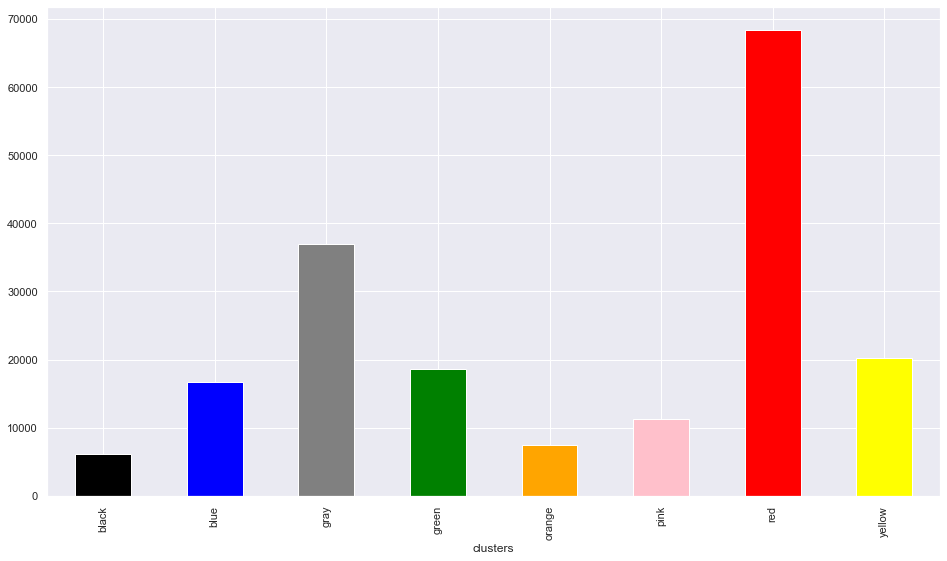

In [137]:
df_clusters = pd.DataFrame(df["clusters"])
df_clusters["count"] = 1
fig, ax = plt.subplots(figsize=(16, 9))
df_clusters.groupby("clusters").sum().plot.bar(ax=ax, color=[colors], legend=None);

In [138]:
for col in columns:
    try:
        df[col] = df[col].astype(float)
        bp = df.boxplot(column=col, by="clusters", showfliers=False, figsize=(16, 9), return_type="dict", patch_artist=True)
        for b, c in zip(bp[col]["boxes"], colors):
            b.set_color(c)
    except ValueError:
#         df_col = df.groupby("clusters")[col].value_counts()
#         df_col = pd.DataFrame(df_col).rename(columns={col: "count"}).reset_index().pivot(col, "clusters", "count")
#         plt.figure(figsize=(16, 9))
#         plot_stacked_bar(df_col.to_numpy(), series_labels=df_col.index, category_labels=df_col.columns.tolist())
        raise
    plt.savefig(f"plots/ml_variables/{col}.png")
    plt.close()

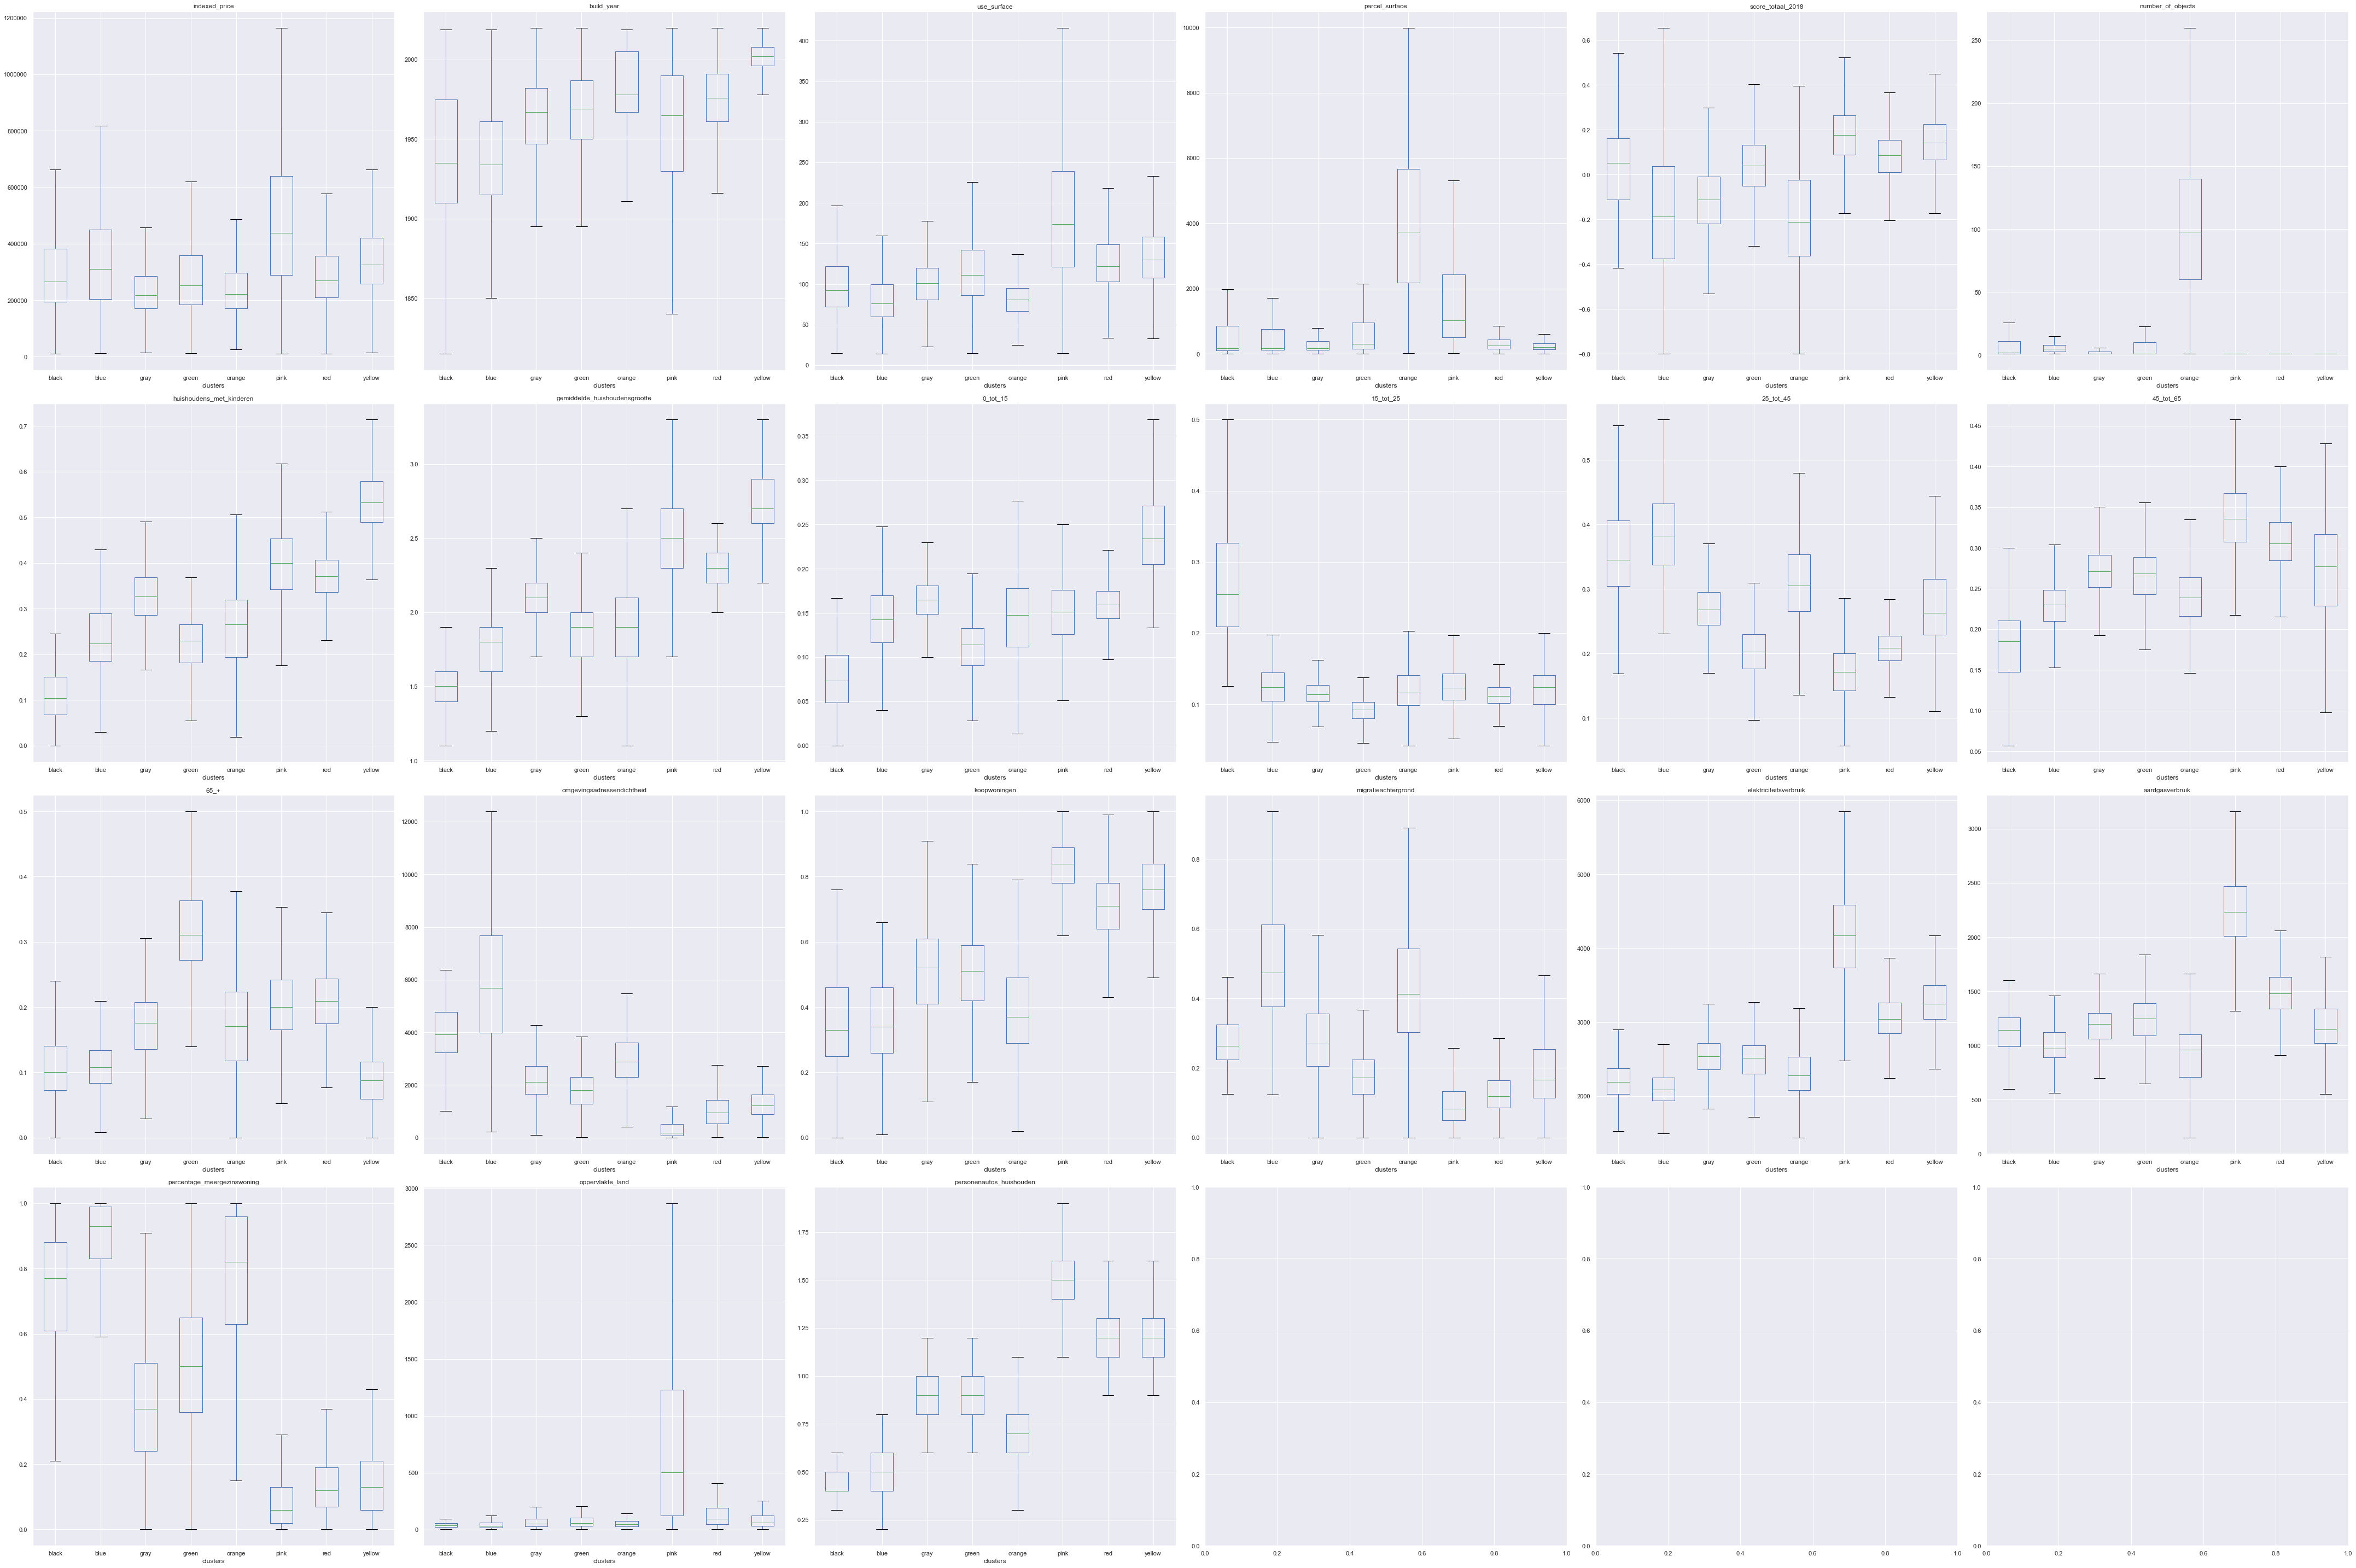

In [139]:
cols = iter(columns)
r, c = 4, 6
fig, ax = plt.subplots(r, c, figsize=(c * 10, r * 10))
with suppress(StopIteration):
    for i in range(r):
        for j in range(c):
            bp = df.boxplot(column=next(cols), by="clusters", showfliers=False, ax=ax[i, j])
plt.title("")
plt.suptitle("")
plt.tight_layout()
plt.savefig("plots/all.png")

In [21]:
clusters = {}
for cluster in df["clusters"].unique():
    df_cluster = df[df["clusters"] == cluster]
    clusters[cluster] = {}
    for col in columns:
        clusters[cluster][col] = df_cluster[col].describe().to_dict()
clusters